In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from dmd import Dmd1d
from simulation import Simulation1d

# Sideview of DMD with a few mirrors

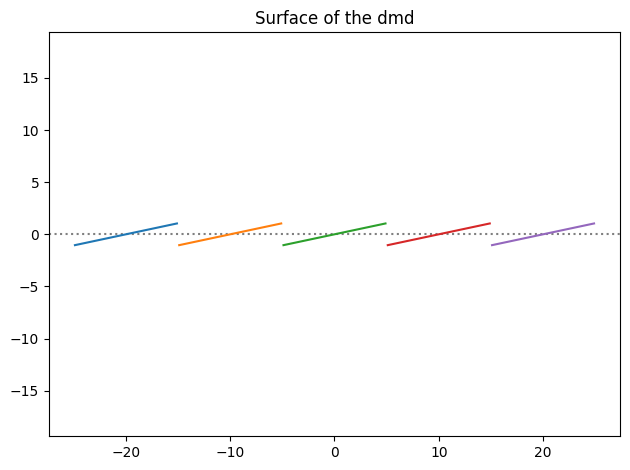

In [2]:
dmd_test = Dmd1d(12, 10, 0, 5, 10)
dmd_test.display_dmd()

# Simulation setup

In [3]:
# initiate dmd
dmd = Dmd1d(tilt_angle=12,
           mirror_size=6, 
           mirror_gap=0.1, 
           nr_x=3,
           nr_sources_per_mirror=30)

# initiate simulation
sim = Simulation1d(dmd=dmd,
                 incident_angle=90,
                 wavelength=3,
                 field_dimensions=(25, 25),
                 res=50,
                 source_type="spherical")

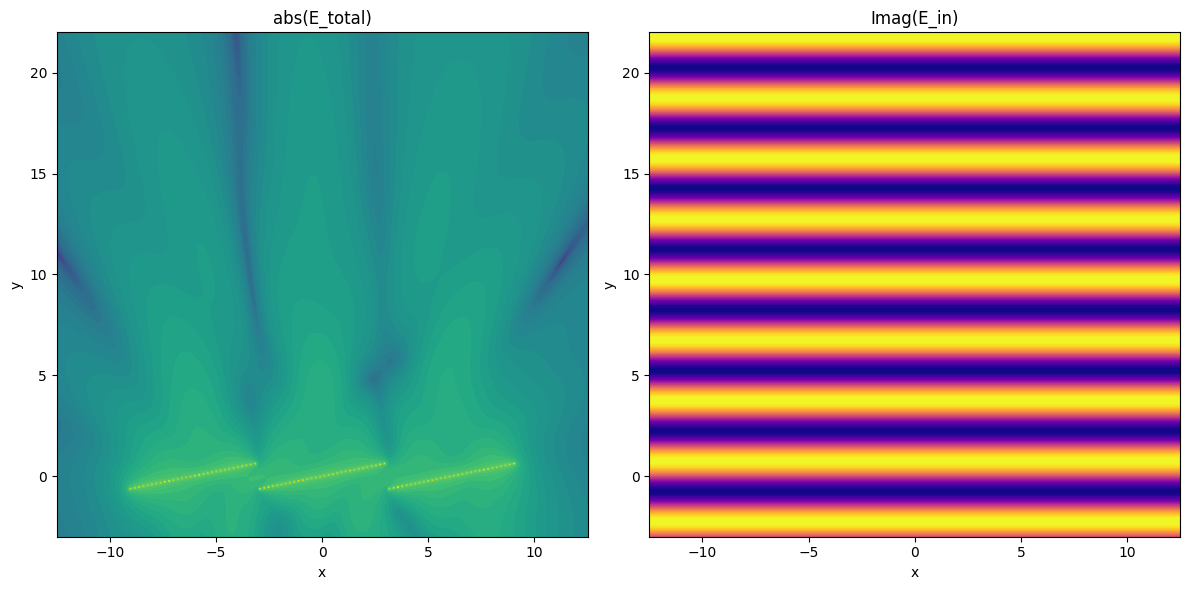

In [4]:
def plot_reflected_and_incident_field(sim: Simulation1d):
    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot the real part of the total reflected field
    plt.subplot(1, 2, 1)
    plt.contourf(sim.X, sim.Y, np.log(np.abs(sim.get_E_total())), levels=50, cmap='viridis')
    plt.title('abs(E_total)')
    plt.xlabel('x')
    plt.ylabel('y')

    # Plot the imaginary part of the total reflected field
    plt.subplot(1, 2, 2)
    plt.contourf(sim.X, sim.Y, np.imag((sim.E_incident)), levels=50, cmap='plasma')
    plt.title('Imag(E_in)')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.tight_layout()
    plt.show()

plot_reflected_and_incident_field(sim)

# Simulate near-field using different sources types

## One mirror

In [5]:
# initiate dmd
dmd_one_mirror = Dmd1d(
    tilt_angle=12,
    mirror_size=20, 
    mirror_gap=1, 
    nr_x=1,
    nr_sources_per_mirror=60
)

sim_one_spherical = Simulation1d(
    dmd=dmd_one_mirror,
    incident_angle=90,
    wavelength=2,
    field_dimensions=(25, 25),
    res=50,
    source_type="spherical"
)

sim_one_plane = Simulation1d(
    dmd=dmd_one_mirror,
    incident_angle=90,
    wavelength=2,
    field_dimensions=(25, 25),
    res=50,
    source_type="plane"
)

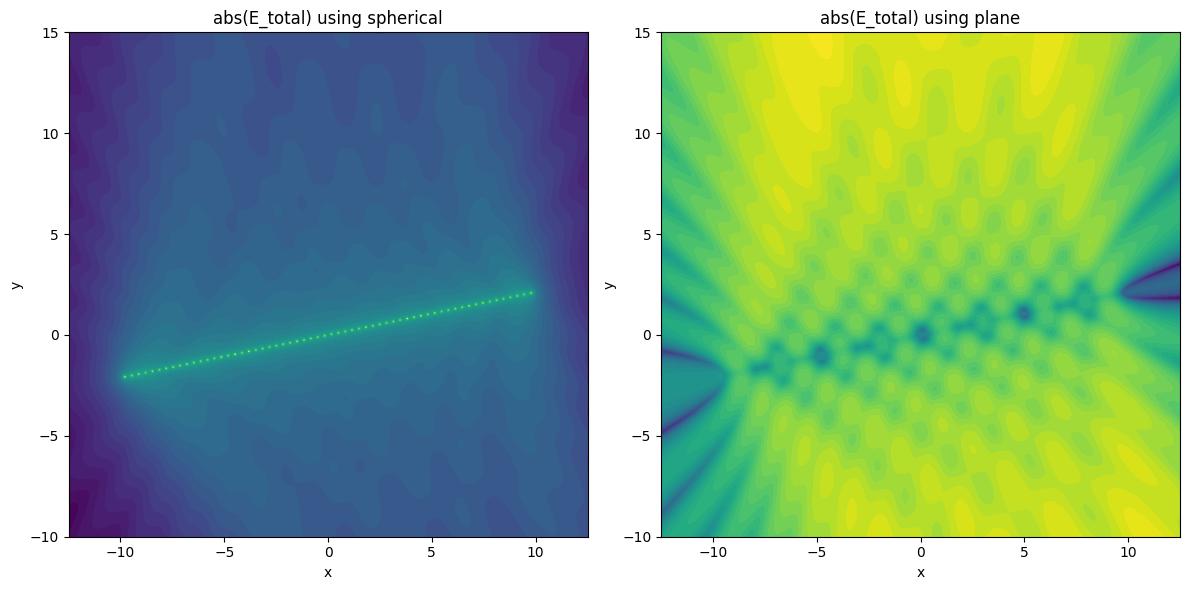

In [6]:
def plot_two_reflected_fields(sim1: Simulation1d, sim2: Simulation1d):
    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot the real part of the total reflected field
    plt.subplot(1, 2, 1)
    plt.contourf(sim1.X, sim1.Y, np.log(np.abs(sim1.get_E_total())), levels=50, cmap='viridis')
    plt.title('abs(E_total) using ' + sim1.source_type)
    plt.xlabel('x')
    plt.ylabel('y')

    # Plot the imaginary part of the total reflected field
    plt.subplot(1, 2, 2)
    plt.contourf(sim2.X, sim2.Y, np.log(np.abs(sim2.get_E_total())), levels=50, cmap='viridis')
    plt.title('abs(E_total) using ' + sim2.source_type)
    plt.xlabel('x')
    plt.ylabel('y')

    plt.tight_layout()
    plt.show()

plot_two_reflected_fields(sim_one_spherical, sim_one_plane)

## Multiple mirrors

In [7]:
# initiate dmd
dmd_multi_mirror = Dmd1d(
    tilt_angle=12,
    mirror_size=2, 
    mirror_gap=1, 
    nr_x=10,
    nr_sources_per_mirror=12
)

sim_multi_spherical = Simulation1d(
    dmd=dmd_multi_mirror,
    incident_angle=90,
    wavelength=2,
    field_dimensions=(25, 25),
    res=50,
    source_type="spherical"
)

sim_multi_plane = Simulation1d(
    dmd=dmd_multi_mirror,
    incident_angle=90,
    wavelength=2,
    field_dimensions=(25, 25),
    res=50,
    source_type="plane"
)


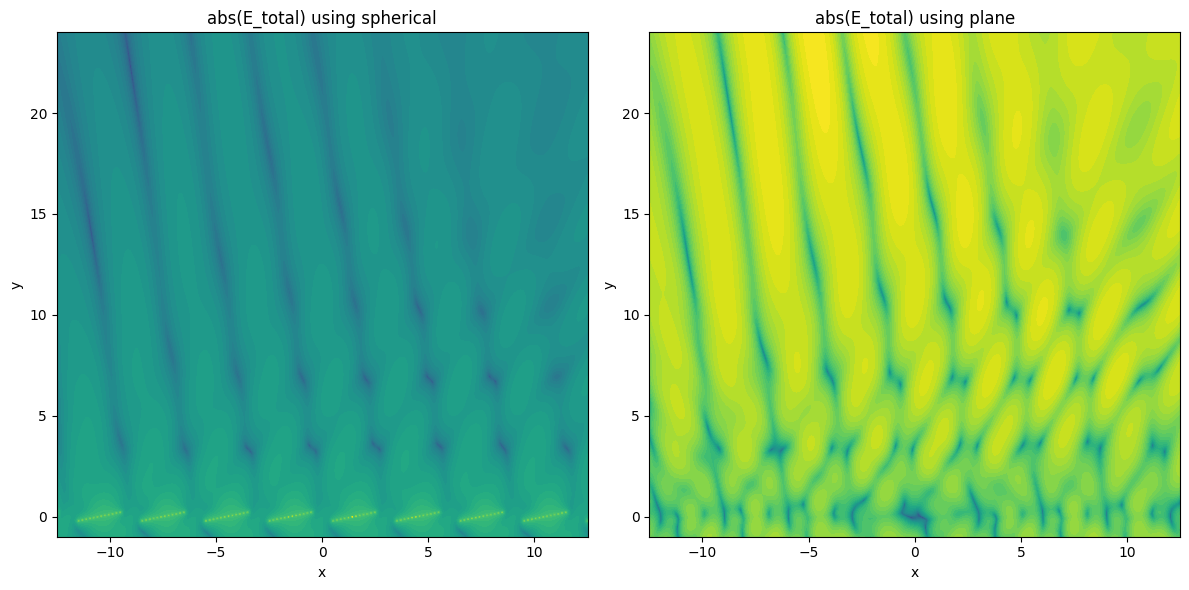

In [8]:
plot_two_reflected_fields(sim_multi_spherical, sim_multi_plane)

# Simulate far-field using different sources types

## One mirror

In [9]:
# initiate dmd
dmd_one_mirror_far = Dmd1d(
    tilt_angle=12,
    mirror_size=20e-6, 
    mirror_gap=1e-6, 
    nr_x=1,
    nr_sources_per_mirror=60
)

sim_one_spherical_far = Simulation1d(
    dmd=dmd_one_mirror_far,
    incident_angle=90,
    wavelength=2e-6,
    field_dimensions=(25, 25),
    res=50,
    source_type="spherical"
)

sim_one_plane_far = Simulation1d(
    dmd=dmd_one_mirror_far,
    incident_angle=90,
    wavelength=2e-6,
    field_dimensions=(25, 25),
    res=50,
    source_type="plane"
)


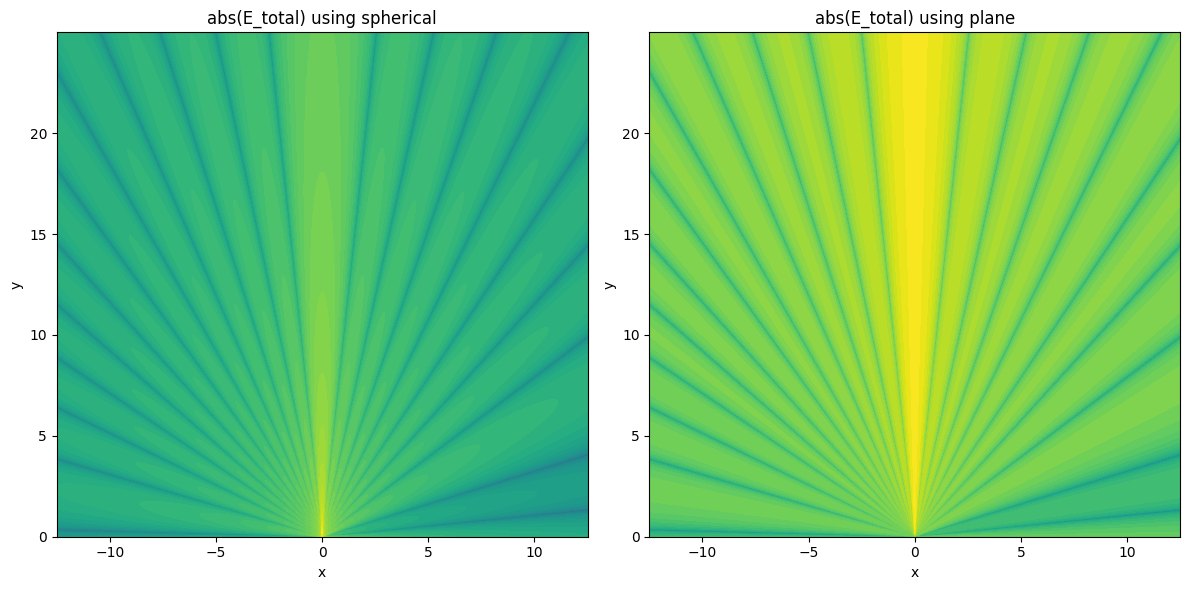

In [10]:
plot_two_reflected_fields(sim_one_spherical_far, sim_one_plane_far)

## Multiple mirrors

In [11]:
# initiate dmd
dmd_multi_mirror_far = Dmd1d(
    tilt_angle=12,
    mirror_size=20e-6, 
    mirror_gap=1e-6, 
    nr_x=50,
    nr_sources_per_mirror=12
)

sim_multi_spherical_far = Simulation1d(
    dmd=dmd_multi_mirror_far,
    incident_angle=90,
    wavelength=2e-6,
    field_dimensions=(25, 25),
    res=50,
    source_type="spherical"
)

sim_multi_plane_far = Simulation1d(
    dmd=dmd_multi_mirror_far,
    incident_angle=90,
    wavelength=2e-6,
    field_dimensions=(25, 25),
    res=50,
    source_type="plane"
)

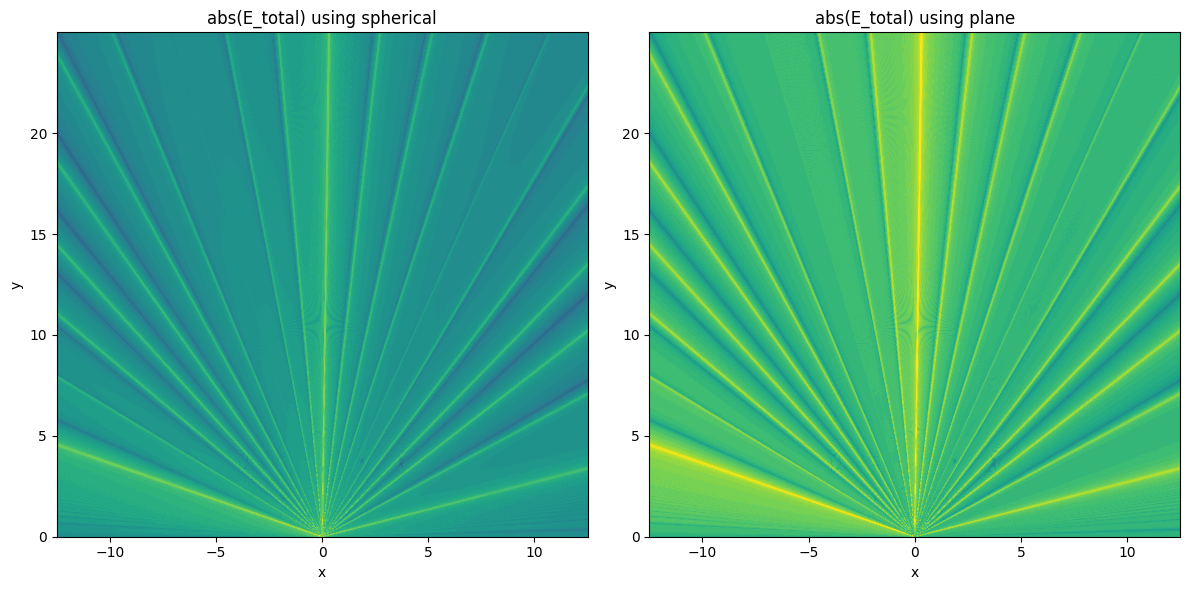

In [12]:
plot_two_reflected_fields(sim_multi_spherical_far, sim_multi_plane_far)